## Day and night classification

Using data from project [AMOS](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes), develop a model that classifies images between day and night.

### Main pipeline activities

1. Normalize
2. Feature extraction
3. Develop classification model
4. Evaluate model
5. Suggested architecture

*Adapted from [repository](https://github.com/udacity/CVND_Exercises/blob/master/1_1_Image_Representation) of Udacity's Computer Vision, author Cezanne Camacho.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

from src.dataset_loader import load_images
from src.image_preprocessing import ImagePreprocessing

In [2]:
image_prepro = ImagePreprocessing()

In [3]:
test_images_list = load_images("imagens/test")
train_images_list = load_images("imagens/training")

### 1. Normalize

Develop a function that receives an image and redize it to 1000 x 600.
First, let's inspect some imagens.

The below image have size 700 height and 1300 width.

Text(0.5, 1.0, 'night')

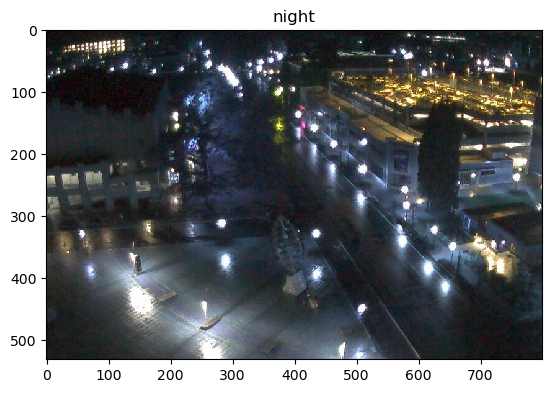

In [4]:
plt.imshow(train_images_list[200][0])
plt.title(train_images_list[200][1])

The below image is smaller, 350 x 650 pixels.

Text(0.5, 1.0, 'day')

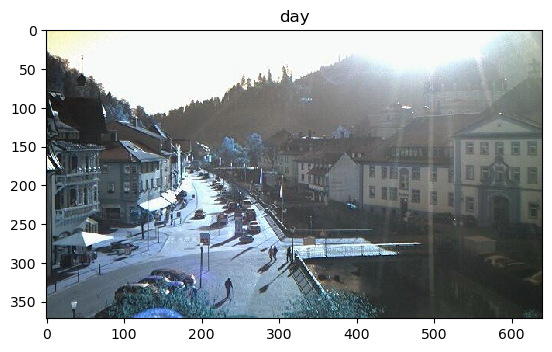

In [5]:
plt.imshow(train_images_list[0][0])
plt.title(train_images_list[0][1])

### 2. Extract features

For each image analyzed, extract the brightness component associated.

Now let's build a list with all images and their brightness extracted. Also we will label using hot-encoding, 1 being day and 0 night.

Testing the image labels and normalization.

Text(0.5, 1.0, 'day')

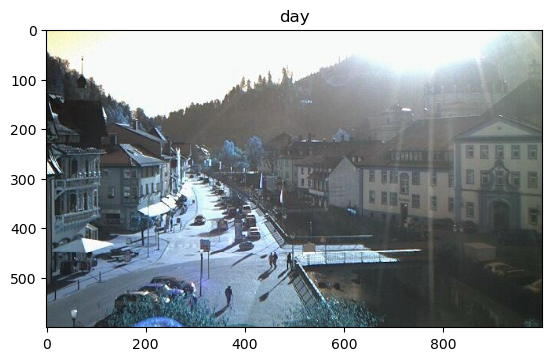

In [6]:
plt.imshow(image_prepro.normalize_image(train_images_list[0][0]))
plt.title(train_images_list[0][1])

Text(0.5, 1.0, 'night')

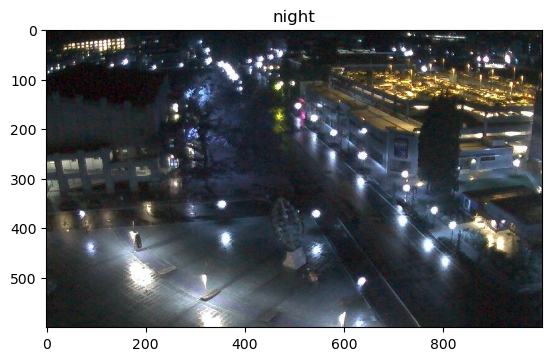

In [7]:
plt.imshow(image_prepro.normalize_image(train_images_list[200][0]))
plt.title(train_images_list[200][1])

Getting the feature from both groups, train and test.

In [8]:
train_normalized_image_list = image_prepro.preprocess_image_list(train_images_list)
test_normalized_image_list = image_prepro.preprocess_image_list(test_images_list)

### 3. Develop classifier

Development of a machine learning model able to classify, with at least 90% accuracy, if an image is taken during the day or at night.

In [9]:
classificador_decision_tree = DecisionTreeClassifier(random_state=0)

We need to split feature (X) and class (Y) to feed a ``ScikitLearn`` model.

In [10]:
def split_class_and_feature(normalized_list):
    X = []
    Y = []

    for item in normalized_list:
        X.append(item[0])
        Y.append(item[1])

    X = np.array(X).reshape(-1, 1)
    Y = np.array(Y).reshape(-1, 1)

    return X, Y

In [11]:
X, Y = split_class_and_feature(train_normalized_image_list)

In [12]:
classificador_decision_tree.fit(X, Y)

DecisionTreeClassifier(random_state=0)

Testando algumas classificações.

Text(0.5, 1.0, 'day')

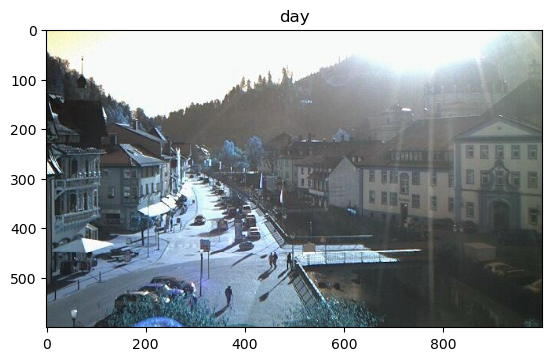

In [13]:
plt.imshow(image_prepro.normalize_image(train_images_list[0][0]))
plt.title(train_images_list[0][1])

In [14]:
classificador_decision_tree.predict(train_normalized_image_list[0][0].reshape(-1, 1))

array([1])

Text(0.5, 1.0, 'night')

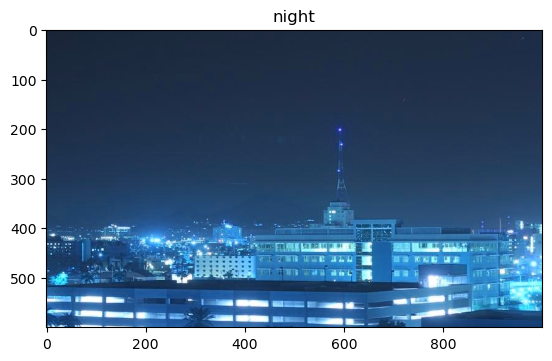

In [15]:
plt.imshow(image_prepro.normalize_image(train_images_list[150][0]))
plt.title(train_images_list[150][1])

In [16]:
classificador_decision_tree.predict(train_normalized_image_list[150][0].reshape(-1, 1))

array([0])

### 4. Model evaluation

Let's check model's accuracy, as mentioned we need a model with accuracy above 90%.

In [17]:
X_test, Y_test = split_class_and_feature(test_normalized_image_list)
Y_pred = classificador_decision_tree.predict(X_test)

### 4.1 Accuracy

The accuracy is above 90% in test dataset.

In [18]:
accuracy_score(Y_test, Y_pred)

0.9125

### 4.2 Confusion Matrix

Plot confusion matrix using test data.

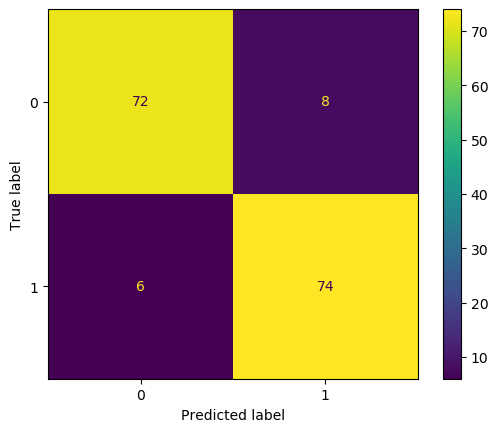

In [19]:
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)

### 5. Suggested Architecture
As accuracy is above the baseline established, we can proceed with the deployment, the suggested architecture includes:

![suggested architecture](./_readme/architecture.png)

- Saving the images into a google storage bucket
- Retrieving the data storaged to feed the model
- Transform the images using opencv
- Train the model using sklearn model
- Save experiment into mlflow for tracking, datasets used for traning and testing, as well as the model itself, hyperparameters, model results and more.
- If model results is satisfactory, register the model in mlflow for production environment.
- Now we have two paths depending on the use case. The first one would make offline predictions, saving new images into a bucket and from time to time or when the bucket have a certain amount of images, run the predictions into all the images inside this bucket and save it with the already predicted images that is accessable to the stakeholder. This process can be orchestrated with airflow though a DAG/workflow and would be the cheapest option. If online prediction is needed, then we need to deploy an API, using BentoML to abstract and Yatai por deployment. Then we can develop an app so the stakeholder can input an image and we will predict day and night accordingly.
- All code need to be versioned at Github, with all best practices and CI/CD.
- Model costs as well as production results should be monitored in Grafana so we can track data drift and anomalies. As well may not have natural labels, we also may need human in the loop for feedback.
